In [100]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

from IPython.core.display import HTML

from ipywidgets import interact_manual
import ipywidgets as widgets

%matplotlib inline

# CS 182 Demo: Data Augmentations

A theme that has been discussed throughout the discussion of machine learning and deep learning is regularization. Specifically in this class, we've covered adapting our models to make sure it does not overfit on training data -- that it generalizes well to unseen data. Many of the approaches discussed, such as batch normalization, layer normalization, and dropoout involve tuning and adjusting the inner workings of our deep learning architectures. However, data augmentation provides a different approach to regularizing our models. When working with image data & object detection tasks, a primary goal of developing practical and strong Convolutional Neural Networks (CNNs) is to provide an architecture that has invariances built into it.


## Loading the Model Architecture

Let us utilize the AlexNet architecture. The AlexNet architecture consists of five convolutional layers, five ReLU (activation) layers, three max pooling layers, followed by a multi layer perceptron (MLP) with dropout woven within. The AlexNet is a powerful architecture that has had success in object detection tasks within image data.

In [18]:
model = torchvision.models.alexnet(weights=None, num_classes=10)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Loading the Data: CIFAR-10

The CIFAR-10 dataset contains 45,000 images, each labeled as one of the following classes:

0. airplane										
1. automobile										
2. bird										
3. cat										
4. deer										
5. dog										
6. frog										
7. horse										
8. ship										
9. truck

The CIFAR-10 dataset is often used in training and evaluating models due to its large size, but also its simplicity due to its low number of classes

In [83]:
# transform = transforms.Compose([
#     transforms.Resize((224, 224)), # Resize to 224x224 for ResNet models
#     transforms.ToTensor()
# ])

class_to_label = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 
                  5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

data_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
data_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Display a couple images
@interact_manual(idx=widgets.IntSlider(min=0, max=len(data_train)-1, step=1))
def show_image_with_label(idx):
    """Show an image with a label"""
    im, label = data_train[idx]
    
    # Show image with HTML label
    plt.imshow(im)
    cls = class_to_label.get(label)
    display(HTML(f"<h3>{cls.title()}<h3>"))
    plt.xticks([])
    plt.yticks([])

# Part 1: Data Augmentation in Theory

Regularization is necessary for deep learning models to generalize well to unseen data (usually test data). It can be introduced into models through explicit methods such as a weighted L1 or L2 penalty, for example, in addition to the loss function. However, regularization can also be introduced implicitly into the model through data augmentation.

Consider an edge or a pattern that exists consistently appears near the center of an image in a subset of the training data. For example, this might be the stripes of a tiger, where all the images in the subset of training data contains a centered tiger. The model, in this case consider a CNN, will latch onto that edge or pattern as it is designed to do. Due to translational/equivariance invariance, the model should be able to detect if the tiger and its stripes were shifted around the image, thus providing the model with information to inform its prediction (ideally, that would be 'tiger').

However, in practicality, images are not always as clean cut as the well defined and plucked training examples in datasets in CIFAR-10. The quality of the image could be poor (bluriness) resulting in the model poorly identifying features, or a glare in the picture distracts the model from important patterns and edges that result in a correct classification. It might even be possible that the subset of tiger images are entirely centered on a docile tiger standing horizontally, meaning a rotated or 'active' tiger may result in a misclassification.

Thus, data augmentation during training provides a way of implicitly regularizing the model by artifically creating data or scenarios that could be realistically seen in the real world. These data augmentations force the model to adapt to these changes by relying less on exploiting a few textures or patterns, but rather combinations or a significant amount of features.


Data augmentation is also an avenue for domain knowledge to be exploited to help produce more accurate while still robust models. Experts and scientists can provide encodings of what is important via domain emphasis by selecting data augmentations that accurately represent what the model may encounter post-training.

# Part 2: Basic Augmentations

These augmentations are used to promote invariance to small semantically insignificant changes.

A few basic augmentations are:
1. Random Cropping
2. Rescaling
3. Rotations
3. Subset
4. Color Adjustment
5. Blurring

The basic augmentations included in the lecture are:
1. `autocontrast`
2. `equalize`
3. `posterize`
4. `rotate`
5. `solarize`
6. `shear_{x, y}`
7. `translate_{x, y}`
8. `color`
9. `contrast`
10. `brightness`
11. `sharpness`

These are implemented in the `torchvision.transforms` module as the following:
1. 

In [69]:
data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.GaussianBlur(13, sigma=7),
        transforms.ToTensor(),
        ])

im_aug = data_transforms(im)

In [ ]:
#display some random augmentations; something like a 2x4 grid of various augmentations. Maybe even compare the images
#side by side (pre vs post transformation)

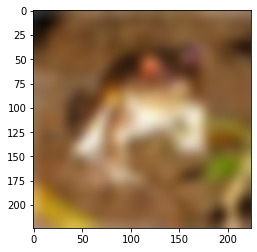

In [70]:
plt.imshow(im_aug.permute(1,2,0))

# Part 3: Advanced Augmentations

Advanced augmentations give more robustness to models. Some examples include:

1. Cutout
2. Mixup
3. CutMix
4. <a href="https://arxiv.org/pdf/2112.05135.pdf">PixMix</a>

In [ ]:
#display some more advanced augmentation

# Part 4: Augmentations in Practice

In [112]:
model.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))